# Initial Setting

In [49]:
import numpy as np
import pybullet as p
import pybullet_data
import time

# Pybullet GUI 창 열기
pID = p.connect(p.GUI)

# 기타 URDF 파일 경로 설정
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# 기존 번잡한 UI를 깔끔하게 바꿔줌
p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
# p.configureDebugVisualizer(p.COV_ENABLE_SHADOWS, 0)
# p.configureDebugVisualizer(p.COV_ENABLE_RGB_BUFFER_PREVIEW, 0)
# p.configureDebugVisualizer(p.COV_ENABLE_DEPTH_BUFFER_PREVIEW, 0)
# p.configureDebugVisualizer(p.COV_ENABLE_SEGMENTATION_MARK_PREVIEW, 0)

# 처음 로드하면 로봇이 굉장히 멀리 있는데, camera position을 카메라에 가깝게 세팅함
p.resetDebugVisualizerCamera(cameraDistance=1, cameraYaw=45, cameraPitch=-30, cameraTargetPosition=[0, 0, 0.7])

# 3D Object 로드
plain_id = p.loadURDF("plane.urdf")
# Solid Robot
#robot_id = p.loadURDF(r"D:\MECH639\mech639_pybullet\urdf\indyRP2\indyrp2.urdf", basePosition=[0, 0, 0], baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))
# Transparent Robot
robot_id = p.loadURDF(r"D:\MECH639\mech639_pybullet\urdf\indyRP2\indyrp2_transp.urdf", basePosition=[0, 0, 0], baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))

# 중력 설정
p.setGravity(0, 0, -9.81) # set gravity

# XYZ 축 표시
z_axis_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=2, radius=0.01, rgbaColor=[0, 0, 1, 1])  # Red sphere shape
z_axis_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=z_axis_visual_shape)
p.resetBasePositionAndOrientation(z_axis_visual_id, [0,0,1], [0,0,1,0])
x_axis_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=2, radius=0.01, rgbaColor=[1, 0, 0, 1])  # Red sphere shape
x_axis_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=x_axis_visual_shape)
p.resetBasePositionAndOrientation(x_axis_visual_id, [1,0,0], [0,1,0,1])
y_axis_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=2, radius=0.01, rgbaColor=[0, 1, 0, 1])  # Red sphere shape
y_axis_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=y_axis_visual_shape)
p.resetBasePositionAndOrientation(y_axis_visual_id, [0,1,0], [-1,0,0,1])

In [54]:
p.disconnect()

In [53]:
p.addUserDebugText("aaa",[1,0,1],textSize=5)

3

In [32]:
p.addUserDebugPoints([[0,1,1]],[[1,0,0]],pointSize=10)

4

In [39]:
p.removeAllUserDebugItems(0)

In [56]:
# CoM of Links 표시
for i in range(p.getNumJoints(robot_id)):
    exec(f"link{i}_visual_shape = p.createVisualShape(p.GEOM_SPHERE, radius=0.03, rgbaColor=[1, 1, 0, 1])  # Red sphere shape")
    exec(f"link{i}_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=link{i}_visual_shape)")
    exec(f"p.resetBasePositionAndOrientation(link{i}_visual_id, p.getLinkState(robot_id, {i})[0], p.getLinkState(robot_id, {i})[1])")


In [76]:
# End-Effector 표시
L_ee = [0,0,0.06] # Zero Position일 때 End-effector의 offset
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.025, rgbaColor=[1, 0, 0, 0.5])  # Red sphere shape
end_effector_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)
p.resetBasePositionAndOrientation(end_effector_visual_id, 
                                  np.array(p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0])+L_ee,
                                  p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[1])
end_effector_visual_id

5

In [34]:
joint_angle = np.array(2*(1-2*np.random.rand(7))).reshape([p.getNumJoints(robot_id)])
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=joint_angle)

for i in range(100):
    p.stepSimulation()
    # Calculate end-effector position
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_position, _ = p.getLinkState(robot_id, end_effector_link_index)[:2]
    end_effector_orientation = p.getLinkState(robot_id, end_effector_link_index)[1]
    #trajectory.append(end_effector_position)  # Store end-effector position in trajectory list

    # Update the position of the visual object representing the end-effector in the 3D environment
    p.resetBasePositionAndOrientation(end_effector_visual_id, end_effector_position, end_effector_orientation)

    time.sleep(1./240)

# Remove Bodies except Robot, Plane and axis

In [37]:
def isRemainObject(id):
    if id in [robot_id, plain_id, x_axis_visual_id, y_axis_visual_id, z_axis_visual_id]: return False
    else: return True

for i in [x for x in range(0,100) if isRemainObject(x)]:
    #print(f"Removed Body {i}")
    p.removeBody(i)

# Figure Out Robot's Dimention

In [58]:
for i in range(0,p.getNumJoints(robot_id)):
    print(f"Link {i} Info: ")
    print("-- Position: ", [round(x,4) for x in p.getLinkState(1,i)[0]])
    print("-- Orientation(Q): ", [round(x,2) for x in p.getLinkState(1,i)[1]])
    print("-- Orientation(E): ", [round(x*180/np.pi,2) for x in p.getEulerFromQuaternion(p.getLinkState(1,i)[1])])
    print("-- Orientation(A): ", [round(x,6) for x in p.getAxisAngleFromQuaternion(p.getLinkState(1,i)[1])[0]], round(180/np.pi*p.getAxisAngleFromQuaternion(p.getLinkState(1,i)[1])[1],2))
    print("-- Orientation(M): ", [round(x,2) for x in p.getMatrixFromQuaternion(p.getLinkState(1,i)[1])])

Link 0 Info: 
-- Position:  [0.0, 0.0, 0.0775]
-- Orientation(Q):  [-0.0, -0.0, 0.0, 1.0]
-- Orientation(E):  [-0.0, -0.0, 0.0]
-- Orientation(A):  [1.0, 0.0, 0.0] 0.0
-- Orientation(M):  [1.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, -0.0, 1.0]
Link 1 Info: 
-- Position:  [0.0, -0.109, 0.2995]
-- Orientation(Q):  [0.5, 0.5, -0.5, 0.5]
-- Orientation(E):  [0.0, 90.0, -90.0]
-- Orientation(A):  [0.57735, 0.577351, -0.57735] 120.0
-- Orientation(M):  [-0.0, 1.0, 0.0, -0.0, 0.0, -1.0, -1.0, -0.0, 0.0]
Link 2 Info: 
-- Position:  [0.0, -0.1937, 0.6835]
-- Orientation(Q):  [0.0, 0.0, 0.0, 1.0]
-- Orientation(E):  [0.0, 0.0, 0.0]
-- Orientation(A):  [1.0, 0.0, 0.0] 0.0
-- Orientation(M):  [1.0, -0.0, 0.0, 0.0, 1.0, -0.0, -0.0, 0.0, 1.0]
Link 3 Info: 
-- Position:  [0.0, -0.0784, 0.749]
-- Orientation(Q):  [0.5, 0.5, -0.5, 0.5]
-- Orientation(E):  [0.0, 90.0, -90.0]
-- Orientation(A):  [0.577349, 0.577352, -0.57735] 120.0
-- Orientation(M):  [-0.0, 1.0, 0.0, 0.0, 0.0, -1.0, -1.0, -0.0, -0.0]
Link 4 In

# Move Robot Using Joint Angle

## Set Random Joint Angle

In [213]:
import time
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.array(2*(1-2*np.random.rand(7))).reshape([p.getNumJoints(robot_id)]))

for i in range(100):
    p.stepSimulation()
    time.sleep(1./240)

## Set Robot Zero Position

In [164]:
import time
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.zeros(7).reshape([p.getNumJoints(robot_id)]))

for i in range(100):
    p.stepSimulation()
    time.sleep(1./240)

## Set Specific Joint Angle

In [21]:
import time
# thetalist = np.array([0,45,0,-90,0,45,0])
# thetalist = np.array([170,0,0,0,0,0,0])
# thetalist = np.array([0,0,90,0,0,0,0])
thetalist = np.ones(7)*10
# thetalist = np.array([170.01224834774075,19.90207326018981,33.05070859545958,154.8715380004641,56.22058650480949,51.59578506452726,56.76358544110735])
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=(thetalist*np.pi/180.0).reshape([p.getNumJoints(robot_id)]))

for i in range(100):
    p.stepSimulation()
    time.sleep(1./240)
    

print(f"Last Link Info: ")
print("-- Position: ", [round(x,4) for x in p.getLinkState(1,p.getNumJoints(robot_id)-1)[0]])
print("-- Orientation(M): ", [round(x,2) for x in p.getMatrixFromQuaternion(p.getLinkState(1,p.getNumJoints(robot_id)-1)[1])])

Last Link Info: 
-- Position:  [-0.2118, -0.2443, 1.2277]
-- Orientation(M):  [0.64, -0.61, -0.46, 0.61, 0.77, -0.17, 0.46, -0.17, 0.87]


# Move Robot Using FK and IK

## Current Last Link Position

In [121]:
print(f"Current Last Link Info: ")
print("-- Position: ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
print("-- Orientation(M): ", [round(x,2) for x in p.getMatrixFromQuaternion(p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[1])])
print(p.getLinkState(robot_id,p.getNumJoints(robot_id)-1))

Current Last Link Info: 
-- Position:  [0.0, -0.1864, 1.267]
-- Orientation(M):  [1.0, -0.0, 0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 1.0]
((4.137306072380456e-07, -0.18640000013906277, 1.266999999997328), (2.196848258861906e-11, 2.2297940935334117e-06, 1.8446793349780062e-05, 0.9999999998273719), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), (4.1373061776539544e-07, -0.18639999628067017, 1.2669999599456787), (2.196848432334253e-11, 2.2297940631688107e-06, 1.8446793546900153e-05, 1.0))


## Move Robot with FK and IK

### Generate Endeffector Marker

In [18]:
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.025, rgbaColor=[1, 0, 0, 0.5])
end_effector_visual_sim_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)
end_effector_visual_sim_id

5

In [19]:
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.05, rgbaColor=[0, 1, 0, 0.5])
end_effector_visual_cal_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)
end_effector_visual_cal_id

6

### FK

In [27]:
from RoboticsCore import *

h7 = 0.06 # zero position에서 Endeffector의 offset
Tee = np.array([
    [ 1, 0, 0,  0],
    [ 0, 1, 0,  0],
    [ 0, 0, 1, h7],
    [ 0, 0, 0,  1]])
M = np.array([
    [ 1, 0, 0,       0],
    [ 0, 1, 0, -0.1864],
    [ 0, 0, 1,  1.2670],
    [ 0, 0, 0,       1]]) # == Tsb(0)
Blist = np.array([
    [ 0.1864,0,0,0,	0,1],
    [-0.9675,0,0,0,-1,0],
    [-0.0073,0,0,0,	0,1],
    [ -0.518,0,0,0,-1,0],
    [  0.183,0,0,0,	0,1],
    [ -0.168,0,0,0,-1,0],
    [      0,0,0,0,	0,1]]).T
Slist = np.array([
    [      0,0,0,0, 0,1],
    [ 0.2995,0,0,0,-1,0],
    [-0.1937,0,0,0, 0,1],
    [  0.749,0,0,0,-1,0],
    [-0.0034,0,0,0, 0,1],
    [  1.099,0,0,0,-1,0],
    [-0.1864,0,0,0, 0,1]]).T

# thetalist_des = np.array([0,0,0,0,0,90,0]) # degree
thetalist_des = np.array(2*(1-2*np.random.rand(7)))*180.0/np.pi
# thetalist_des = np.ones(7)*90

Tb = FKinBody(M,Blist,thetalist_des*np.pi/180.0)
Ts = FKinSpace(M,Slist,thetalist_des*np.pi/180.0)
print(">>> Mean of FKs-FKb(T): ", np.mean(Tb-Ts))
T = np.dot(Ts,Tee)

print(">>> Desired Joint Angle: ",[round(x,4) for x in thetalist_des])
print(">>> Desired Position(Cal): ",[round(x,4) for x in T[0:3,3]])
qw = np.sqrt(1+T[0,0]+T[1,1]+T[2,2])/2.0

#p.resetBasePositionAndOrientation(end_effector_visual_cal_id, T[0:3,3], [(T[2,1]-T[1,2])/(4*qw),(T[0,2]-T[2,0])/(4*qw),(T[1,0]-T[0,1])/(4*qw),qw])

# for yungtae
p.resetBasePositionAndOrientation(end_effector_visual_cal_id, (np.dot(Ts,np.array([0,0,h7,1])))[0:3], [(Ts[2,1]-Ts[1,2])/(4*qw),(Ts[0,2]-Ts[2,0])/(4*qw),(Ts[1,0]-Ts[0,1])/(4*qw),qw])

# Set Zero Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.zeros(7).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      p.getLinkState(robot_id, end_effector_link_index)[0]+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)

# Plot Desired Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=(thetalist_des*np.pi/180.0).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)

print(">>> Final   Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
print(">>> Differ  Position     : ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]])


>>> Mean of FKs-FKb(T):  -1.214306433183765e-17
>>> Desired Joint Angle:  [-52.8191, -20.9083, -0.6628, 53.4644, 47.6047, -46.6225, 96.326]
>>> Desired Position(Cal):  [0.0581, -0.0789, 1.2785]
>>> Final   Position(Sim):  [0.0305, -0.0961, 1.228]
>>> Differ  Position     :  [-0.0276, -0.0172, -0.0504]


### FK and IK

In [110]:
from RoboticsCore import *

h7 = 0.06 # zero position에서 Endeffector의 offset
Tee = np.array([
    [ 1, 0, 0,  0],
    [ 0, 1, 0,  0],
    [ 0, 0, 1, h7],
    [ 0, 0, 0,  1]])
M = np.array([
    [ 1, 0, 0,       0],
    [ 0, 1, 0, -0.1864],
    [ 0, 0, 1,  1.2670],
    [ 0, 0, 0,       1]])
Blist = np.array([
    [ 0.1864,0,0,0,	0,1],
    [-0.9675,0,0,0,-1,0],
    [-0.0073,0,0,0,	0,1],
    [ -0.518,0,0,0,-1,0],
    [  0.183,0,0,0,	0,1],
    [ -0.168,0,0,0,-1,0],
    [      0,0,0,0,	0,1]]).T
Slist = np.array([
    [      0,0,0,0, 0,1],
    [ 0.2995,0,0,0,-1,0],
    [-0.1937,0,0,0, 0,1],
    [  0.749,0,0,0,-1,0],
    [-0.0034,0,0,0, 0,1],
    [  1.099,0,0,0,-1,0],
    [-0.1864,0,0,0, 0,1]]).T

thetalist_des = np.array([0,0,0,90,90,0,0]) # degree

eomg = 0.0001
ev = 0.0001
amp_noise = 10

angle_noise = np.random.rand(p.getNumJoints(robot_id))*amp_noise*180/np.pi
thetalist0 = thetalist_des - angle_noise
#thetalist0 = np.zeros(p.getNumJoints(robot_id))

Tb = FKinBody(M,Blist,thetalist_des*np.pi/180.0)
Ts = FKinSpace(M,Slist,thetalist_des*np.pi/180.0)
print(">>> Mean of FKs-FKb(T): ", np.mean(Tb-Ts))

T = np.dot(Tb,Tee)
qw = np.sqrt(1+T[0,0]+T[1,1]+T[2,2])/2.0
p.resetBasePositionAndOrientation(end_effector_visual_cal_id, T[0:3,3], [(T[2,1]-T[1,2])/(4*qw),(T[0,2]-T[2,0])/(4*qw),(T[1,0]-T[0,1])/(4*qw),qw])

thetalist_IK = IKinBody(Blist, M, Tb, thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)

# Apply Joint Angle Constrains
if True:
    print(">>> InvKine Joint Angle(rad): ", [round(x,4) for x in thetalist_IK[0]], thetalist_IK[1])
    print(">>> InvKine Joint Angle(deg): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
    for i in range(p.getNumJoints(robot_id)):
        if thetalist_IK[0][i] < np.pi and thetalist_IK[0][i] > -np.pi:
            thetalist_IK[0][i] = thetalist_IK[0][i]
        else:
            thetalist_IK[0][i] = (thetalist_IK[0][i]+np.pi) % (np.pi*2) - np.pi
    print(">>> Result of IK(deg,%,const): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi])

print(">>> Desired Joint Angle: ", thetalist_des)
print(">>> Noise of Initial Point: ",[round(x,2) for x in angle_noise])
print(">>> Initial Joint Angle: ",[round(x,2) for x in thetalist0])
print(">>> InvKine Joint Angle: ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
print(">>> Desired Position(Cal): ",[round(x,4) for x in Tb[0:3,3]])

# Set Zero Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.zeros(7).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)

# Plot Desired Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=(thetalist_des*np.pi/180.0).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)
print(">>> Desired Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])

# Set Zero Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.zeros(7).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)

# Plot Inverse Kinematics Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=(thetalist_IK[0]).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)
print(">>> Final   Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
print(">>> Differ  Position     : ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]])


>>> Mean of FKs-FKb(T):  -2.2171934427328566e-17


[IKinBody] Root Finding with iterative Newton-Raphson:   2%|▎         | 25/1000 [00:00<00:02, 464.51it/s]

>>> InvKine Joint Angle(rad):  [-25.2855, 7.5158, -57.0869, 4.8021, 22.2968, -33.1062, 5.2814] True
>>> InvKine Joint Angle(deg):  [-1448.75, 430.62, -3270.84, 275.14, 1277.51, -1896.85, 302.6] True
>>> Result of IK(deg,%,const):  [-8.75, 70.62, -30.84, -84.86, -162.49, -96.85, -57.4]
>>> Desired Joint Angle:  [ 0  0  0 90 90  0  0]
>>> Noise of Initial Point:  [53.6, 403.99, 357.44, 179.06, 232.83, 10.98, 270.71]
>>> Initial Joint Angle:  [-53.6, -403.99, -357.44, -89.06, -142.83, -10.98, -270.71]
>>> InvKine Joint Angle:  [-8.75, 70.62, -30.84, -84.86, -162.49, -96.85, -57.4] True
>>> Desired Position(Cal):  [-0.518, -0.0034, 0.932]


>>> Desired Position(Sim):  [-0.518, -0.0034, 0.932]
>>> Final   Position(Sim):  [-0.5406, -0.0249, 0.9215]
>>> Differ  Position     :  [0.0374, -0.0215, -0.0105]


### IK

In [80]:
from RoboticsCore import *
T = np.array([
    [ 1, 0, 0,    0.31],
    [ 0, 1, 0, -0.0864],
    [ 0, 0, 1,  1.0670],
    [ 0, 0, 0,       1]])


h7 = 0.06 # zero position에서 Endeffector의 offset
Tee = np.array([
    [ 1, 0, 0,  0],
    [ 0, 1, 0,  0],
    [ 0, 0, 1, h7],
    [ 0, 0, 0,  1]])
M = np.array([
    [ 1, 0, 0,       0],
    [ 0, 1, 0, -0.1864],
    [ 0, 0, 1,  1.2670],
    [ 0, 0, 0,       1]])
Blist = np.array([
    [ 0.1864,0,0,0,	0,1],
    [-0.9675,0,0,0,-1,0],
    [-0.0073,0,0,0,	0,1],
    [ -0.518,0,0,0,-1,0],
    [  0.183,0,0,0,	0,1],
    [ -0.168,0,0,0,-1,0],
    [      0,0,0,0,	0,1]]).T
Slist = np.array([
    [      0,0,0,0, 0,1],
    [ 0.2995,0,0,0,-1,0],
    [-0.1937,0,0,0, 0,1],
    [  0.749,0,0,0,-1,0],
    [-0.0034,0,0,0, 0,1],
    [  1.099,0,0,0,-1,0],
    [-0.1864,0,0,0, 0,1]]).T

eomg = 0.0001
ev = 0.0001
amp_noise = 10
#thetalist0 = np.zeros(p.getNumJoints(robot_id))
thetalist0 = (np.random.rand(p.getNumJoints(robot_id))-1.0)*2.0
thetalist_IK = IKinBody(Blist, M, np.dot(TransInv(Tee),T), thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)
# thetalist_IK = IKinSpace(Slist, M, T, thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)
qw = np.sqrt(1+T[0,0]+T[1,1]+T[2,2])/2.0
p.resetBasePositionAndOrientation(end_effector_visual_cal_id, T[0:3,3], [(T[2,1]-T[1,2])/(4*qw),(T[0,2]-T[2,0])/(4*qw),(T[1,0]-T[0,1])/(4*qw),qw])
# Apply Joint Angle Constrains
if True:
    print(">>> InvKine Joint Angle(rad): ", [round(x,4) for x in thetalist_IK[0]], thetalist_IK[1])
    print(">>> InvKine Joint Angle(deg): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
    for i in range(p.getNumJoints(robot_id)):
        if thetalist_IK[0][i] < np.pi and thetalist_IK[0][i] > -np.pi:
            thetalist_IK[0][i] = thetalist_IK[0][i]
        else:
            thetalist_IK[0][i] = (thetalist_IK[0][i]+np.pi) % (np.pi*2) - np.pi
    print(">>> Result of IK(deg,%,const): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi])

print(">>> Initial Joint Angle: ",[round(x,2) for x in thetalist0])
print(">>> InvKine Joint Angle: ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
print(">>> Desired Position(Cal): ",[round(x,4) for x in T[0:3,3]])

# Set Zero Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.zeros(7).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)

# Plot Inverse Kinematics Position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=(thetalist_IK[0]).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
    end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
    p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                      np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                      p.getLinkState(robot_id, end_effector_link_index)[1])
    time.sleep(1./240)
print(">>> Final   Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
print(">>> Differ  Position     : ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]])


[IKinBody] Root Finding with iterative Newton-Raphson:   2%|▏         | 16/1000 [00:00<00:02, 411.63it/s]


>>> InvKine Joint Angle(rad):  [-305.4701, -143.3573, 207.2932, 225.0811, 95.096, -62.8952, -9.5155] True
>>> InvKine Joint Angle(deg):  [-17502.15, -8213.77, 11877.03, 12896.2, 5448.6, -3603.63, -545.2] True
>>> Result of IK(deg,%,const):  [137.85, 66.23, -2.97, -63.8, 48.6, -3.63, 174.8]
>>> Initial Joint Angle:  [-1.38, -0.17, -1.67, -1.17, -0.78, -0.69, -0.59]
>>> InvKine Joint Angle:  [137.85, 66.23, -2.97, -63.8, 48.6, -3.63, 174.8] True
>>> Desired Position(Cal):  [0.31, -0.0864, 1.067]
>>> Final   Position(Sim):  [0.31, -0.0864, 1.007]
>>> Differ  Position     :  [-0.0, -0.0, -0.06]


# Generate Circular Motion

## Generate circle in Space 1

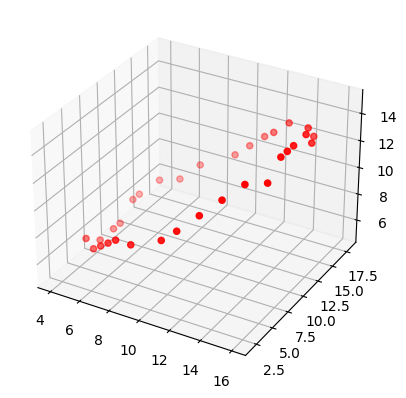

In [8]:
from matplotlib import pyplot as plt

#creating a 3d numpy array (empty in this example, but will represent a binary 3D image in my application)
space=np.zeros((40,40,20))

r = 8 #radius of the circle
theta = np.pi / 5 # "tilt" of the circle
phirange = np.arange(0, 2 * np.pi,0.2) #to make a full circle

#center of the circle
center=[10.0,10.0,10.0]

#computing the values of the circle in spherical coordinates and converting them
#back to cartesian
for phi in phirange:
    x = r * np.cos(theta) * np.cos(phi) + center[0]
    y=  r * np.sin(phi)  + center[1]
    z=  r * np.sin(theta)* np.cos(phi) + center[2]
    space[int(round(x)),int(round(y)),int(round(z))]=1

x,y,z = space.nonzero()

#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')
plt.show()

## Generate circle in Space 2

C:\Users\user\AppData\Local\Temp\ipykernel_31800\670902190.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_circle,y_circle,z_circle, marker='o', s=15, cmap='Greens')


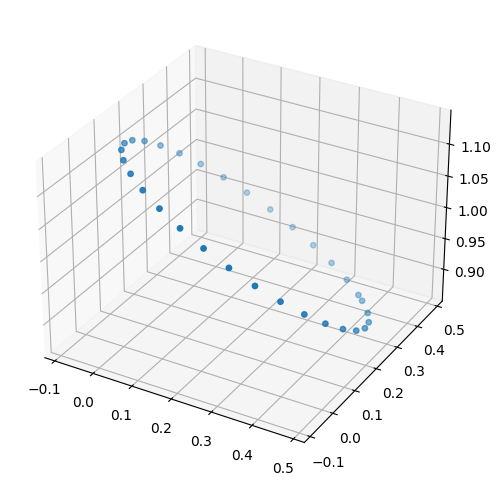

In [148]:
from matplotlib import pyplot as plt

t = np.arange(0,2*np.pi,0.2)
r = 0.3
p0 = np.array([0.2,0.2,1.0])
p1 = np.array([1,1,-0.7])
p1 =  p1 / np.linalg.norm(p1) 
p2 = np.array([1,-1,0])
p2 =  p2 / np.linalg.norm(p2) 
p_circle = []
for tt in t : 
    p_circle.append(p0+r*np.cos(tt)*p1+r*np.sin(tt)*p2)
p_circle = np.array(p_circle)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
x_circle = p_circle[:,0]
y_circle = p_circle[:,1]
z_circle = p_circle[:,2]
ax.scatter(x_circle,y_circle,z_circle, marker='o', s=15, cmap='Greens')

plt.show()

## Plot circle in 3D Space

In [165]:
# circle 표시
x_circle = np.array(x_circle)
y_circle = np.array(y_circle)
z_circle = np.array(z_circle)
for i in range(len(x_circle)):
    exec(f"trace{i}_visual_shape = p.createVisualShape(p.GEOM_SPHERE, radius=0.03, rgbaColor=[0, 0, 1, 1])  # Red sphere shape")
    exec(f"trace{i}_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=trace{i}_visual_shape)")
    exec(f"p.resetBasePositionAndOrientation(trace{i}_visual_id, [x_circle[{i}],y_circle[{i}],z_circle[{i}]], [1,0,0,1])")

In [163]:
def isRemainObject(id):
    if id in [robot_id, plain_id, x_axis_visual_id, y_axis_visual_id, z_axis_visual_id]: return False
    else: return True

for i in [x for x in range(0,100) if isRemainObject(x)]:
    #print(f"Removed Body {i}")
    p.removeBody(i)

## Tracking Circle

## Tracking Circle 1

In [80]:
from RoboticsCore import *

# Generate Endeffector shape
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.025, rgbaColor=[1, 0, 0, 0.5])
end_effector_visual_sim_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.05, rgbaColor=[0, 1, 0, 0.5])
end_effector_visual_cal_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)

h7 = 0.06 # zero position에서 Endeffector의 offset
Tee = np.array([
    [ 1, 0, 0,  0],
    [ 0, 1, 0,  0],
    [ 0, 0, 1, h7],
    [ 0, 0, 0,  1]])
M = np.array([
    [ 1, 0, 0,       0],
    [ 0, 1, 0, -0.1864],
    [ 0, 0, 1,  1.2670],
    [ 0, 0, 0,       1]])
Blist = np.array([
    [ 0.1864,0,0,0,	0,1],
    [-0.9675,0,0,0,-1,0],
    [-0.0073,0,0,0,	0,1],
    [ -0.518,0,0,0,-1,0],
    [  0.183,0,0,0,	0,1],
    [ -0.168,0,0,0,-1,0],
    [      0,0,0,0,	0,1]]).T
Slist = np.array([
    [      0,0,0,0, 0,1],
    [ 0.2995,0,0,0,-1,0],
    [-0.1937,0,0,0, 0,1],
    [  0.749,0,0,0,-1,0],
    [-0.0034,0,0,0, 0,1],
    [  1.099,0,0,0,-1,0],
    [-0.1864,0,0,0, 0,1]]).T

def MoveRobot(thetalist0, T):
    eomg = 0.001
    ev = 0.0001
    thetalist_IK = IKinBody(Blist, M, np.dot(TransInv(Tee),T), thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)
    # thetalist_IK = IKinSpace(Slist, M, T, thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)
    qw = np.sqrt(1+T[0,0]+T[1,1]+T[2,2])/2.0
    p.resetBasePositionAndOrientation(end_effector_visual_cal_id, T[0:3,3], [(T[2,1]-T[1,2])/(4*qw),(T[0,2]-T[2,0])/(4*qw),(T[1,0]-T[0,1])/(4*qw),qw])
    # Apply Joint Angle Constrains
    if True:
        print(">>> InvKine Joint Angle(rad): ", [round(x,4) for x in thetalist_IK[0]], thetalist_IK[1])
        print(">>> InvKine Joint Angle(deg): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
        for i in range(p.getNumJoints(robot_id)):
            if thetalist_IK[0][i] < np.pi and thetalist_IK[0][i] > -np.pi:
                thetalist_IK[0][i] = thetalist_IK[0][i]
            else:
                thetalist_IK[0][i] = (thetalist_IK[0][i]+np.pi) % (np.pi*2) - np.pi
        print(">>> Result of IK(deg,%,const): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi])
    print(">>> Initial Joint Angle: ",[round(x,2) for x in thetalist0])
    print(">>> InvKine Joint Angle: ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
    print(">>> Desired Position(Cal): ",[round(x,4) for x in T[0:3,3]])

    # Plot Inverse Kinematics Position
    p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                    jointIndices=range(p.getNumJoints(robot_id)),
                                    controlMode=p.POSITION_CONTROL,
                                    targetPositions=(thetalist_IK[0]).reshape([p.getNumJoints(robot_id)]))
    for i in range(100):
        p.stepSimulation()
        end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
        end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
        p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                        np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                        p.getLinkState(robot_id, end_effector_link_index)[1])
        time.sleep(1./240)
    print(">>> Final   Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
    print(">>> Differ  Position     : ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]])
    return thetalist_IK[0]

thetalist0 = (np.random.rand(p.getNumJoints(robot_id))-1.0)*2.0
for i in range(len(x_circle)):
    T = np.array([
        [ 1, 0, 0, x_circle[i]],
        [ 0, 1, 0, y_circle[i]],
        [ 0, 0, 1, z_circle[i]],
        [ 0, 0, 0,    1]])
    thetalist0 = MoveRobot(thetalist0, T)



[IKinBody] Root Finding with iterative Newton-Raphson:   1%|▏         | 14/1000 [00:00<00:01, 540.30it/s]


>>> InvKine Joint Angle(rad):  [26.9071, 64.1188, -75.567, -77.0976, 68.7311, 19.2945, -32.7929] True
>>> InvKine Joint Angle(deg):  [1541.66, 3673.73, -4329.67, -4417.37, 3938.0, 1105.5, -1878.9] True
>>> Result of IK(deg,%,const):  [101.66, 73.73, -9.67, -97.37, -22.0, 25.5, -78.9]
>>> Initial Joint Angle:  [-0.8, -1.79, -0.04, -1.35, -1.29, -0.64, -0.91]
>>> InvKine Joint Angle:  [101.66, 73.73, -9.67, -97.37, -22.0, 25.5, -78.9] True
>>> Desired Position(Cal):  [0.3, -0.3, 1.0]
>>> Final   Position(Sim):  [0.3, -0.3, 0.94]
>>> Differ  Position     :  [-0.0, 0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 9/1000 [00:00<00:01, 501.66it/s]

>>> InvKine Joint Angle(rad):  [-4.0607, 18.9633, -0.3252, -55.2915, 18.8866, 17.4845, -8.19] True
>>> InvKine Joint Angle(deg):  [-232.66, 1086.51, -18.63, -3167.97, 1082.12, 1001.79, -469.25] True
>>> Result of IK(deg,%,const):  [127.34, 6.51, -18.63, 72.03, 2.12, -78.21, -109.25]
>>> Initial Joint Angle:  [1.77, 1.29, -0.17, -1.7, -0.38, 0.44, -1.38]
>>> InvKine Joint Angle:  [127.34, 6.51, -18.63, 72.03, 2.12, -78.21, -109.25] True
>>> Desired Position(Cal):  [0.2907, -0.2475, 1.0525]


>>> Final   Position(Sim):  [0.2907, -0.2475, 0.9925]
>>> Differ  Position     :  [0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 10/1000 [00:00<00:02, 477.78it/s]

>>> InvKine Joint Angle(rad):  [17.6648, -13.4776, -4.7103, 43.1728, 2.0812, -26.2658, -2.8829] True
>>> InvKine Joint Angle(deg):  [1012.12, -772.21, -269.88, 2473.62, 119.24, -1504.92, -165.18] True
>>> Result of IK(deg,%,const):  [-67.88, -52.21, 90.12, -46.38, 119.24, -64.92, -165.18]
>>> Initial Joint Angle:  [2.22, 0.11, -0.33, 1.26, 0.04, -1.37, -1.91]
>>> InvKine Joint Angle:  [-67.88, -52.21, 90.12, -46.38, 119.24, -64.92, -165.18] True
>>> Desired Position(Cal):  [0.2633, -0.1983, 1.1017]


>>> Final   Position(Sim):  [0.2633, -0.1983, 1.0417]
>>> Differ  Position     :  [0.0, 0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 10/1000 [00:00<00:02, 436.15it/s]

>>> InvKine Joint Angle(rad):  [-21.3263, 0.4376, 25.4456, 5.0367, 22.168, -0.8355, -26.2019] True
>>> InvKine Joint Angle(deg):  [-1221.91, 25.07, 1457.93, 288.58, 1270.13, -47.87, -1501.26] True
>>> Result of IK(deg,%,const):  [-141.91, 25.07, 17.93, -71.42, -169.87, -47.87, -61.26]
>>> Initial Joint Angle:  [-1.18, -0.91, 1.57, -0.81, 2.08, -1.13, -2.88]
>>> InvKine Joint Angle:  [-141.91, 25.07, 17.93, -71.42, -169.87, -47.87, -61.26] True
>>> Desired Position(Cal):  [0.2195, -0.1554, 1.1446]


>>> Final   Position(Sim):  [0.1997, -0.1115, 1.1166]
>>> Differ  Position     :  [-0.0198, 0.0439, -0.028]


[IKinBody] Root Finding with iterative Newton-Raphson:   2%|▏         | 21/1000 [00:00<00:01, 520.20it/s]

>>> InvKine Joint Angle(rad):  [-80.0156, 32.1303, 15.876, -23.8431, 63.0297, 24.5413, 20.033] True
>>> InvKine Joint Angle(deg):  [-4584.56, 1840.93, 909.63, -1366.11, 3611.34, 1406.11, 1147.81] True
>>> Result of IK(deg,%,const):  [95.44, 40.93, -170.37, 73.89, 11.34, -33.89, 67.81]
>>> Initial Joint Angle:  [-2.48, 0.44, 0.31, -1.25, -2.96, -0.84, -1.07]
>>> InvKine Joint Angle:  [95.44, 40.93, -170.37, 73.89, 11.34, -33.89, 67.81] True
>>> Desired Position(Cal):  [0.1621, -0.1215, 1.1785]


>>> Final   Position(Sim):  [0.1621, -0.1215, 1.1185]
>>> Differ  Position     :  [-0.0, -0.0001, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 10/1000 [00:00<00:02, 345.97it/s]

>>> InvKine Joint Angle(rad):  [-1.1068, -0.8105, -18.7365, 13.4182, 16.7817, -18.7564, 3.0984] True
>>> InvKine Joint Angle(deg):  [-63.41, -46.44, -1073.52, 768.81, 961.52, -1074.66, 177.53] True
>>> Result of IK(deg,%,const):  [-63.41, -46.44, 6.48, 48.81, -118.48, 5.34, 177.53]
>>> Initial Joint Angle:  [1.67, 0.71, -2.97, 1.29, 0.2, -0.59, 1.18]
>>> InvKine Joint Angle:  [-63.41, -46.44, 6.48, 48.81, -118.48, 5.34, 177.53] True
>>> Desired Position(Cal):  [0.0946, -0.0987, 1.2013]


>>> Final   Position(Sim):  [0.0946, -0.0986, 1.1413]
>>> Differ  Position     :  [0.0, 0.0001, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 6/1000 [00:00<00:02, 493.47it/s]

>>> InvKine Joint Angle(rad):  [-23.4077, -12.0182, -12.1816, 18.1544, 7.1212, -6.017, 28.538] True
>>> InvKine Joint Angle(deg):  [-1341.16, -688.59, -697.95, 1040.17, 408.01, -344.75, 1635.11] True
>>> Result of IK(deg,%,const):  [98.84, 31.41, 22.05, -39.83, 48.01, 15.25, -164.89]
>>> Initial Joint Angle:  [-1.11, -0.81, 0.11, 0.85, -2.07, 0.09, 3.1]
>>> InvKine Joint Angle:  [98.84, 31.41, 22.05, -39.83, 48.01, 15.25, -164.89] True
>>> Desired Position(Cal):  [0.0212, -0.0884, 1.2116]


>>> Final   Position(Sim):  [0.0213, -0.0885, 1.1517]
>>> Differ  Position     :  [0.0001, -0.0001, -0.0599]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 9/1000 [00:00<00:02, 430.00it/s]

>>> InvKine Joint Angle(rad):  [13.3949, -5.7613, -8.744, -105.5953, 38.1313, -19.6963, 7.6875] True
>>> InvKine Joint Angle(deg):  [767.47, -330.1, -500.99, -6050.16, 2184.76, -1128.51, 440.46] True
>>> Result of IK(deg,%,const):  [47.47, 29.9, -140.99, 69.84, 24.76, -48.51, 80.46]
>>> Initial Joint Angle:  [1.73, 0.55, 0.38, -0.7, 0.84, 0.27, -2.88]
>>> InvKine Joint Angle:  [47.47, 29.9, -140.99, 69.84, 24.76, -48.51, 80.46] True
>>> Desired Position(Cal):  [-0.0535, -0.0913, 1.2087]


>>> Final   Position(Sim):  [-0.0535, -0.0913, 1.1487]
>>> Differ  Position     :  [-0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|▏         | 13/1000 [00:00<00:02, 483.09it/s]

>>> InvKine Joint Angle(rad):  [15.0395, 6.7871, 18.7964, 23.9262, -3.1812, -25.8363, -18.1044] True
>>> InvKine Joint Angle(deg):  [861.7, 388.87, 1076.96, 1370.87, -182.27, -1480.31, -1037.3] True
>>> Result of IK(deg,%,const):  [141.7, 28.87, -3.04, -69.13, 177.73, -40.31, 42.7]
>>> Initial Joint Angle:  [0.83, 0.52, -2.46, 1.22, 0.43, -0.85, 1.4]
>>> InvKine Joint Angle:  [141.7, 28.87, -3.04, -69.13, 177.73, -40.31, 42.7] True
>>> Desired Position(Cal):  [-0.1248, -0.1071, 1.1929]


>>> Final   Position(Sim):  [-0.1883, -0.0864, 1.0814]
>>> Differ  Position     :  [-0.0635, 0.0207, -0.1115]


[IKinBody] Root Finding with iterative Newton-Raphson:   3%|▎         | 28/1000 [00:00<00:02, 476.12it/s]

>>> InvKine Joint Angle(rad):  [35.5164, 17.847, -35.3061, -7.1741, 26.7562, -6.8951, -39.8295] True
>>> InvKine Joint Angle(deg):  [2034.94, 1022.56, -2022.89, -411.04, 1533.02, -395.06, -2282.06] True
>>> Result of IK(deg,%,const):  [-125.06, -57.44, 137.11, -51.04, 93.02, -35.06, -122.06]
>>> Initial Joint Angle:  [2.47, 0.5, -0.05, -1.21, 3.1, -0.7, 0.75]
>>> InvKine Joint Angle:  [-125.06, -57.44, 137.11, -51.04, 93.02, -35.06, -122.06] True
>>> Desired Position(Cal):  [-0.1885, -0.1349, 1.1651]


>>> Final   Position(Sim):  [-0.1884, -0.135, 1.1051]
>>> Differ  Position     :  [0.0001, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 9/1000 [00:00<00:02, 451.47it/s]

>>> InvKine Joint Angle(rad):  [-30.2929, -11.6116, 62.8929, 11.6583, 33.7298, -6.2155, -47.4556] True
>>> InvKine Joint Angle(deg):  [-1735.66, -665.3, 3603.5, 667.97, 1932.57, -356.12, -2719.01] True
>>> Result of IK(deg,%,const):  [64.34, 54.7, 3.5, -52.03, 132.57, 3.88, 160.99]
>>> Initial Joint Angle:  [-2.18, -1.0, 2.39, -0.89, 1.62, -0.61, -2.13]
>>> InvKine Joint Angle:  [64.34, 54.7, 3.5, -52.03, 132.57, 3.88, 160.99] True
>>> Desired Position(Cal):  [-0.2403, -0.173, 1.127]


>>> Final   Position(Sim):  [-0.2404, -0.173, 1.067]
>>> Differ  Position     :  [-0.0, 0.0001, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|▏         | 14/1000 [00:00<00:01, 529.91it/s]

>>> InvKine Joint Angle(rad):  [79.0892, 37.4355, 35.4789, -30.4899, -25.3679, -7.3824, -76.7435] True
>>> InvKine Joint Angle(deg):  [4531.48, 2144.89, 2032.79, -1746.94, -1453.47, -422.98, -4397.08] True
>>> Result of IK(deg,%,const):  [-148.52, -15.11, -127.21, 53.06, -13.47, -62.98, -77.08]
>>> Initial Joint Angle:  [1.12, 0.95, 0.06, -0.91, 2.31, 0.07, 2.81]
>>> InvKine Joint Angle:  [-148.52, -15.11, -127.21, 53.06, -13.47, -62.98, -77.08] True
>>> Desired Position(Cal):  [-0.2773, -0.219, 1.081]


>>> Final   Position(Sim):  [-0.2772, -0.219, 1.021]
>>> Differ  Position     :  [0.0001, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   0%|          | 5/1000 [00:00<00:02, 456.07it/s]

>>> InvKine Joint Angle(rad):  [91.7653, -12.8806, 154.7633, 32.4157, -81.9251, -20.076, -164.7385] True
>>> InvKine Joint Angle(deg):  [5257.77, -738.0, 8867.29, 1857.28, -4693.96, -1150.27, -9438.82] True
>>> Result of IK(deg,%,const):  [-142.23, -18.0, -132.71, 57.28, -13.96, -70.27, -78.82]
>>> Initial Joint Angle:  [-2.59, -0.26, -2.22, 0.93, -0.24, -1.1, -1.35]
>>> InvKine Joint Angle:  [-142.23, -18.0, -132.71, 57.28, -13.96, -70.27, -78.82] True
>>> Desired Position(Cal):  [-0.297, -0.2701, 1.0299]


>>> Final   Position(Sim):  [-0.297, -0.2701, 0.9699]
>>> Differ  Position     :  [0.0, 0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 11/1000 [00:00<00:01, 513.07it/s]

>>> InvKine Joint Angle(rad):  [87.0351, -19.6468, 192.2685, 42.4688, -106.2482, -17.9431, -178.987] True
>>> InvKine Joint Angle(deg):  [4986.75, -1125.68, 11016.18, 2433.28, -6087.57, -1028.07, -10255.2] True
>>> Result of IK(deg,%,const):  [-53.25, -45.68, -143.82, -86.72, 32.43, 51.93, -175.2]
>>> Initial Joint Angle:  [-2.48, -0.31, -2.32, 1.0, -0.24, -1.23, -1.38]
>>> InvKine Joint Angle:  [-53.25, -45.68, -143.82, -86.72, 32.43, 51.93, -175.2] True
>>> Desired Position(Cal):  [-0.2982, -0.323, 0.977]


>>> Final   Position(Sim):  [-0.2983, -0.323, 0.917]
>>> Differ  Position     :  [-0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 7/1000 [00:00<00:02, 390.18it/s]

>>> InvKine Joint Angle(rad):  [-27.3633, 6.2824, 92.3354, -54.8311, -28.2751, 45.7001, -36.6979] True
>>> InvKine Joint Angle(deg):  [-1567.8, 359.96, 5290.43, -3141.59, -1620.04, 2618.42, -2102.63] True
>>> Result of IK(deg,%,const):  [-127.8, -0.04, -109.57, 98.41, 179.96, 98.42, 57.37]
>>> Initial Joint Angle:  [-0.93, -0.8, -2.51, -1.51, 0.57, 0.91, -3.06]
>>> InvKine Joint Angle:  [-127.8, -0.04, -109.57, 98.41, 179.96, 98.42, 57.37] True
>>> Desired Position(Cal):  [-0.2809, -0.3744, 0.9256]


>>> Final   Position(Sim):  [-0.2022, -0.3347, 0.9269]
>>> Differ  Position     :  [0.0788, 0.0397, 0.0013]


[IKinBody] Root Finding with iterative Newton-Raphson:   0%|          | 5/1000 [00:00<00:02, 418.03it/s]

>>> InvKine Joint Angle(rad):  [26.3013, -17.3365, 16.719, 7.2513, -82.9617, 7.3653, 40.5839] True
>>> InvKine Joint Angle(deg):  [1506.96, -993.31, 957.93, 415.47, -4753.35, 422.0, 2325.29] True
>>> Result of IK(deg,%,const):  [66.96, 86.69, -122.07, 55.47, -73.35, 62.0, 165.29]
>>> Initial Joint Angle:  [-2.23, -0.0, -1.91, 1.72, 3.14, 1.72, 1.0]
>>> InvKine Joint Angle:  [66.96, 86.69, -122.07, 55.47, -73.35, 62.0, 165.29] True
>>> Desired Position(Cal):  [-0.2462, -0.4212, 0.8788]


>>> Final   Position(Sim):  [-0.2462, -0.4212, 0.8188]
>>> Differ  Position     :  [-0.0, 0.0001, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 6/1000 [00:00<00:01, 547.31it/s]

>>> InvKine Joint Angle(rad):  [50.9073, -4.5853, -63.1311, 10.503, -50.9808, -5.8211, 62.8119] True
>>> InvKine Joint Angle(deg):  [2916.77, -262.72, -3617.15, 601.78, -2920.98, -333.52, 3598.86] True
>>> Result of IK(deg,%,const):  [36.77, 97.28, -17.15, -118.22, -40.98, 26.48, -1.14]
>>> Initial Joint Angle:  [1.17, 1.51, -2.13, 0.97, -1.28, 1.08, 2.88]
>>> InvKine Joint Angle:  [36.77, 97.28, -17.15, -118.22, -40.98, 26.48, -1.14] True
>>> Desired Position(Cal):  [-0.1961, -0.4605, 0.8395]


>>> Final   Position(Sim):  [-0.1961, -0.4606, 0.7794]
>>> Differ  Position     :  [0.0, -0.0001, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   3%|▎         | 28/1000 [00:00<00:02, 426.94it/s]

>>> InvKine Joint Angle(rad):  [-6.2099, 38.9216, 36.4381, -65.3679, -1.1231, -4.5946, -49.7613] True
>>> InvKine Joint Angle(deg):  [-355.8, 2230.04, 2087.75, -3745.31, -64.35, -263.25, -2851.11] True
>>> Result of IK(deg,%,const):  [4.2, 70.04, -72.25, -145.31, -64.35, 96.75, 28.89]
>>> Initial Joint Angle:  [0.64, 1.7, -0.3, -2.06, -0.72, 0.46, -0.02]
>>> InvKine Joint Angle:  [4.2, 70.04, -72.25, -145.31, -64.35, 96.75, 28.89] True
>>> Desired Position(Cal):  [-0.1338, -0.4899, 0.8101]


>>> Final   Position(Sim):  [-0.1338, -0.4899, 0.7501]
>>> Differ  Position     :  [0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   0%|          | 5/1000 [00:00<00:03, 323.27it/s]

>>> InvKine Joint Angle(rad):  [-30.3377, 33.1732, 31.4207, -89.6615, 6.2057, 50.2049, -7.2832] True
>>> InvKine Joint Angle(deg):  [-1738.22, 1900.68, 1800.27, -5137.22, 355.56, 2876.53, -417.3] True
>>> Result of IK(deg,%,const):  [61.78, 100.68, 0.27, -97.22, -4.44, -3.47, -57.3]
>>> Initial Joint Angle:  [0.07, 1.22, -1.26, -2.54, -1.12, 1.69, 0.5]
>>> InvKine Joint Angle:  [61.78, 100.68, 0.27, -97.22, -4.44, -3.47, -57.3] True
>>> Desired Position(Cal):  [-0.0632, -0.5074, 0.7926]


>>> Final   Position(Sim):  [-0.0632, -0.5074, 0.7326]
>>> Differ  Position     :  [0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|▏         | 14/1000 [00:00<00:01, 502.91it/s]

>>> InvKine Joint Angle(rad):  [25.0013, 31.0821, 7.8977, -54.2388, 38.1428, 35.4246, -45.1695] True
>>> InvKine Joint Angle(deg):  [1432.47, 1780.88, 452.5, -3107.65, 2185.42, 2029.68, -2588.02] True
>>> Result of IK(deg,%,const):  [-7.53, -19.12, 92.5, 132.35, 25.42, -130.32, -68.02]
>>> Initial Joint Angle:  [1.08, 1.76, 0.0, -1.7, -0.08, -0.06, -1.0]
>>> InvKine Joint Angle:  [-7.53, -19.12, 92.5, 132.35, 25.42, -130.32, -68.02] True
>>> Desired Position(Cal):  [0.0113, -0.512, 0.788]


>>> Final   Position(Sim):  [0.0113, -0.512, 0.7281]
>>> Differ  Position     :  [-0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 6/1000 [00:00<00:03, 279.88it/s]

>>> InvKine Joint Angle(rad):  [31.043, -20.5352, -46.9854, 67.4362, 1.6277, -43.8445, 14.4686] True
>>> InvKine Joint Angle(deg):  [1778.63, -1176.58, -2692.06, 3863.81, 93.26, -2512.1, 828.99] True
>>> Result of IK(deg,%,const):  [-21.37, -96.58, -172.06, -96.19, 93.26, 7.9, 108.99]
>>> Initial Joint Angle:  [-0.13, -0.33, 1.61, 2.31, 0.44, -2.27, -1.19]
>>> InvKine Joint Angle:  [-21.37, -96.58, -172.06, -96.19, 93.26, 7.9, 108.99] True
>>> Desired Position(Cal):  [0.0851, -0.5034, 0.7966]


>>> Final   Position(Sim):  [0.0851, -0.5035, 0.7366]
>>> Differ  Position     :  [0.0, -0.0001, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   2%|▏         | 16/1000 [00:00<00:02, 416.92it/s]

>>> InvKine Joint Angle(rad):  [-29.5066, -6.1377, 88.3704, -29.5555, -22.0539, 27.1262, -36.8946] True
>>> InvKine Joint Angle(deg):  [-1690.6, -351.66, 5063.25, -1693.41, -1263.6, 1554.22, -2113.91] True
>>> Result of IK(deg,%,const):  [109.4, 8.34, 23.25, 106.59, 176.4, 114.22, 46.09]
>>> Initial Joint Angle:  [-0.37, -1.69, -3.0, -1.68, 1.63, 0.14, 1.9]
>>> InvKine Joint Angle:  [109.4, 8.34, 23.25, 106.59, 176.4, 114.22, 46.09] True
>>> Desired Position(Cal):  [0.1536, -0.4822, 0.8178]


>>> Final   Position(Sim):  [0.2193, -0.451, 0.8094]
>>> Differ  Position     :  [0.0657, 0.0312, -0.0084]


[IKinBody] Root Finding with iterative Newton-Raphson:   2%|▏         | 18/1000 [00:00<00:01, 531.00it/s]

>>> InvKine Joint Angle(rad):  [-168.0476, 125.9407, 0.0392, -463.3495, -163.3741, 343.6922, 331.3692] True
>>> InvKine Joint Angle(deg):  [-9628.42, 7215.87, 2.25, -26547.97, -9360.65, 19692.11, 18986.06] True
>>> Result of IK(deg,%,const):  [91.58, 15.87, 2.25, 92.03, -0.65, -107.89, -93.94]
>>> Initial Joint Angle:  [1.91, 0.15, 0.41, 1.86, 3.08, 1.99, 0.8]
>>> InvKine Joint Angle:  [91.58, 15.87, 2.25, 92.03, -0.65, -107.89, -93.94] True
>>> Desired Position(Cal):  [0.2126, -0.4497, 0.8503]


>>> Final   Position(Sim):  [0.2126, -0.4497, 0.7903]
>>> Differ  Position     :  [-0.0, -0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 6/1000 [00:00<00:02, 430.01it/s]

>>> InvKine Joint Angle(rad):  [26.2562, -23.6969, -15.912, 64.3173, 4.9629, -44.191, -15.4886] True
>>> InvKine Joint Angle(deg):  [1504.37, -1357.73, -911.69, 3685.11, 284.35, -2531.96, -887.43] True
>>> Result of IK(deg,%,const):  [64.37, 82.27, 168.31, 85.11, -75.65, -11.96, -167.43]
>>> Initial Joint Angle:  [1.6, 0.28, 0.04, 1.61, -0.01, -1.88, -1.64]
>>> InvKine Joint Angle:  [64.37, 82.27, 168.31, 85.11, -75.65, -11.96, -167.43] True
>>> Desired Position(Cal):  [0.2584, -0.4078, 0.8922]


>>> Final   Position(Sim):  [0.2584, -0.4078, 0.8322]
>>> Differ  Position     :  [0.0, 0.0, -0.06]


[IKinBody] Root Finding with iterative Newton-Raphson:   0%|          | 5/1000 [00:00<00:02, 385.93it/s]

>>> InvKine Joint Angle(rad):  [27.7273, 0.8429, -83.1169, 26.6666, 25.9686, -26.7796, 30.2743] True
>>> InvKine Joint Angle(deg):  [1588.66, 48.29, -4762.25, 1527.88, 1487.89, -1534.36, 1734.59] True
>>> Result of IK(deg,%,const):  [148.66, 48.29, -82.25, 87.88, 47.89, -94.36, -65.41]
>>> Initial Joint Angle:  [1.12, 1.44, 2.94, 1.49, -1.32, -0.21, -2.92]
>>> InvKine Joint Angle:  [148.66, 48.29, -82.25, 87.88, 47.89, -94.36, -65.41] True
>>> Desired Position(Cal):  [0.2881, -0.3593, 0.9407]


>>> Final   Position(Sim):  [0.2881, -0.3593, 0.8807]
>>> Differ  Position     :  [0.0, -0.0001, -0.0601]


[IKinBody] Root Finding with iterative Newton-Raphson:   1%|          | 10/1000 [00:00<00:02, 404.64it/s]

>>> InvKine Joint Angle(rad):  [23.6274, -12.8882, -13.6472, 32.8647, -22.2846, -23.8284, -6.7814] True
>>> InvKine Joint Angle(deg):  [1353.75, -738.44, -781.93, 1883.01, -1276.82, -1365.26, -388.55] True
>>> Result of IK(deg,%,const):  [-86.25, -18.44, -61.93, 83.01, 163.18, 74.74, -28.55]
>>> Initial Joint Angle:  [2.59, 0.84, -1.44, 1.53, 0.84, -1.65, -1.14]
>>> InvKine Joint Angle:  [-86.25, -18.44, -61.93, 83.01, 163.18, 74.74, -28.55] True
>>> Desired Position(Cal):  [0.2998, -0.307, 0.993]


>>> Final   Position(Sim):  [0.282, -0.2878, 0.9569]
>>> Differ  Position     :  [-0.0178, 0.0192, -0.0361]


## Tracking Circle 2

In [167]:
from RoboticsCore import *

# Generate Endeffector shape
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.025, rgbaColor=[1, 0, 0, 0.5])
end_effector_visual_sim_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.05, rgbaColor=[0, 1, 0, 0.5])
end_effector_visual_cal_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)

h7 = 0.06 # zero position에서 Endeffector의 offset
Tee = np.array([
    [ 1, 0, 0,  0],
    [ 0, 1, 0,  0],
    [ 0, 0, 1, h7],
    [ 0, 0, 0,  1]])
M = np.array([
    [ 1, 0, 0,       0],
    [ 0, 1, 0, -0.1864],
    [ 0, 0, 1,  1.2670],
    [ 0, 0, 0,       1]])
Blist = np.array([
    [ 0.1864,0,0,0,	0,1],
    [-0.9675,0,0,0,-1,0],
    [-0.0073,0,0,0,	0,1],
    [ -0.518,0,0,0,-1,0],
    [  0.183,0,0,0,	0,1],
    [ -0.168,0,0,0,-1,0],
    [      0,0,0,0,	0,1]]).T
Slist = np.array([
    [      0,0,0,0, 0,1],
    [ 0.2995,0,0,0,-1,0],
    [-0.1937,0,0,0, 0,1],
    [  0.749,0,0,0,-1,0],
    [-0.0034,0,0,0, 0,1],
    [  1.099,0,0,0,-1,0],
    [-0.1864,0,0,0, 0,1]]).T

def MoveRobot(thetalist0, T, v, on_track):
    eomg = 0.001
    ev = 0.0001

    if on_track:    
        Jb = JacobianBody(Blist,thetalist0)
        theta_dot = np.dot(np.linalg.pinv(Jb),v)
        thetalist_IK = [thetalist0 + theta_dot,True]

    else:
        # thetalist_IK = IKinSpace(Slist, M, T, thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)
        thetalist_IK = IKinBody(Blist, M, np.dot(TransInv(Tee),T), thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)

    qw = np.sqrt(1+T[0,0]+T[1,1]+T[2,2])/2.0
    p.resetBasePositionAndOrientation(end_effector_visual_cal_id, T[0:3,3], [(T[2,1]-T[1,2])/(4*qw),(T[0,2]-T[2,0])/(4*qw),(T[1,0]-T[0,1])/(4*qw),qw])
    # Apply Joint Angle Constrains
    if True:
        print(">>> InvKine Joint Angle(rad): ", [round(x,4) for x in thetalist_IK[0]], thetalist_IK[1])
        print(">>> InvKine Joint Angle(deg): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
        for i in range(p.getNumJoints(robot_id)):
            if thetalist_IK[0][i] < np.pi and thetalist_IK[0][i] > -np.pi:
                thetalist_IK[0][i] = thetalist_IK[0][i]
            else:
                thetalist_IK[0][i] = (thetalist_IK[0][i]+np.pi) % (np.pi*2) - np.pi
        print(">>> Result of IK(deg,%,const): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi])
    print(">>> Initial Joint Angle: ",[round(x,2) for x in thetalist0])
    print(">>> InvKine Joint Angle: ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
    print(">>> Desired Position(Cal): ",[round(x,4) for x in T[0:3,3]])

    # Plot Inverse Kinematics Position
    p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                    jointIndices=range(p.getNumJoints(robot_id)),
                                    controlMode=p.POSITION_CONTROL,
                                    targetPositions=(thetalist_IK[0]).reshape([p.getNumJoints(robot_id)]))
    for i in range(10):
        p.stepSimulation()
        end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
        end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
        p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                        np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                        p.getLinkState(robot_id, end_effector_link_index)[1])
        time.sleep(1./240)
    print(">>> Final   Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
    print(">>> Differ  Position     : ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]])
    return thetalist_IK[0]

thetalist0 = (np.random.rand(p.getNumJoints(robot_id))-1.0)*2.0

# move to initial point of circle
T0 = np.array([
    [ 1, 0, 0, x_circle[0]],
    [ 0, 1, 0, y_circle[0]],
    [ 0, 0, 1, z_circle[0]],
    [ 0, 0, 0,    1]])
thetalist0 = MoveRobot(thetalist0, T0, np.zeros(7), False)

# track circle
for i in range(1,len(x_circle)):
    T = np.array([
        [ 1, 0, 0, x_circle[i]],
        [ 0, 1, 0, y_circle[i]],
        [ 0, 0, 1, z_circle[i]],
        [ 0, 0, 0,    1]])
    v = np.array([
        x_circle[(i+1)%len(x_circle)]-x_circle[i],
        y_circle[(i+1)%len(y_circle)]-y_circle[i],
        z_circle[(i+1)%len(z_circle)]-z_circle[i],
        0,0,0]).T
    thetalist0 = MoveRobot(thetalist0, T, v, True)


[IKinBody] Root Finding with iterative Newton-Raphson:   0%|          | 5/1000 [00:00<00:01, 557.52it/s]


>>> InvKine Joint Angle(rad):  [-80.8779, -95.8878, 83.9708, 243.1939, 136.8109, -149.9337, -140.914] True
>>> InvKine Joint Angle(deg):  [-4633.96, -5493.97, 4811.17, 13933.98, 7838.68, -8590.57, -8073.78] True
>>> Result of IK(deg,%,const):  [46.04, -93.97, 131.17, -106.02, -81.32, 49.43, -153.78]
>>> Initial Joint Angle:  [-0.52, -0.39, -1.73, -1.24, -1.96, -1.09, -1.32]
>>> InvKine Joint Angle:  [46.04, -93.97, 131.17, -106.02, -81.32, 49.43, -153.78] True
>>> Desired Position(Cal):  [0.3901, 0.3901, 0.8669]
>>> Final   Position(Sim):  [0.4967, 0.4821, 0.8099]
>>> Differ  Position     :  [0.1066, 0.0919, -0.057]
>>> InvKine Joint Angle(rad):  [0.7131, -1.6294, 2.3286, -1.879, -1.366, 0.8331, -2.647] True
>>> InvKine Joint Angle(deg):  [40.86, -93.36, 133.42, -107.66, -78.26, 47.73, -151.66] True
>>> Result of IK(deg,%,const):  [40.86, -93.36, 133.42, -107.66, -78.26, 47.73, -151.66]
>>> Initial Joint Angle:  [0.8, -1.64, 2.29, -1.85, -1.42, 0.86, -2.68]
>>> InvKine Joint Angle:  [4

# Generate Arditary Circle and Motion

In [1]:
from RoboticsCore import *
import time

# Clear 3D Space
def isRemainObject(id):
    if id in [robot_id, plain_id, x_axis_visual_id, y_axis_visual_id, z_axis_visual_id]: return False
    else: return True
for i in [x for x in range(0,200) if isRemainObject(x)]: p.removeBody(i)

# Set Robot's zero-position
p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                jointIndices=range(p.getNumJoints(robot_id)),
                                controlMode=p.POSITION_CONTROL,
                                targetPositions=np.zeros(7).reshape([p.getNumJoints(robot_id)]))
for i in range(100):
    p.stepSimulation()
    time.sleep(1./240)

# Generate Arbitary circle Motion
t = np.arange(0,2*np.pi,0.1)
r = 0.1 + (np.random.rand())*0.2
rand_p = (np.random.rand()-0.5)*1
rand_z = 0.8+np.random.rand()*0.3
p0 = np.array([(np.random.rand()-0.5)*0.4,(np.random.rand()-0.5)*0.4,rand_z])
p1 = np.array([rand_p,rand_p,(np.random.rand()-0.5)*1])
#p2 = np.array([rand_x,-rand_y,0])
p2 = np.cross(p0,p1)
p1 =  p1 / np.linalg.norm(p1) 
p2 =  p2 / np.linalg.norm(p2) 
p_circle = []
for tt in t : 
    p_circle.append(p0+r*np.cos(tt)*p1+r*np.sin(tt)*p2)
p_circle = np.array(p_circle)
x_circle = p_circle[:,0]
y_circle = p_circle[:,1]
z_circle = p_circle[:,2]

# Plot circle in 3D Space
x_circle = np.array(x_circle)
y_circle = np.array(y_circle)
z_circle = np.array(z_circle)
for i in range(len(x_circle)):
    exec(f"trace{i}_visual_shape = p.createVisualShape(p.GEOM_SPHERE, radius=0.03, rgbaColor=[0, {i}/(len(x_circle)), 1, 0.5])  # Red sphere shape")
    exec(f"trace{i}_visual_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=trace{i}_visual_shape)")
    exec(f"p.resetBasePositionAndOrientation(trace{i}_visual_id, [x_circle[{i}],y_circle[{i}],z_circle[{i}]], [1,0,0,1])")

# Generate Endeffector shape
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.025, rgbaColor=[1, 0, 0, 0.5])
end_effector_visual_sim_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)
end_effector_visual_shape = p.createVisualShape(p.GEOM_CYLINDER, length=0.03, radius=0.05, rgbaColor=[0, 1, 0, 0.5])
end_effector_visual_cal_id = p.createMultiBody(baseMass=0, baseVisualShapeIndex=end_effector_visual_shape)

# Trajectory Generation
h7 = 0.06 # zero position에서 Endeffector의 offset
Tee = np.array([
    [ 1, 0, 0,  0],
    [ 0, 1, 0,  0],
    [ 0, 0, 1, h7],
    [ 0, 0, 0,  1]])
M = np.array([
    [ 1, 0, 0,       0],
    [ 0, 1, 0, -0.1864],
    [ 0, 0, 1,  1.2670],
    [ 0, 0, 0,       1]])
Blist = np.array([
    [ 0.1864,0,0,0,	0,1],
    [-0.9675,0,0,0,-1,0],
    [-0.0073,0,0,0,	0,1],
    [ -0.518,0,0,0,-1,0],
    [  0.183,0,0,0,	0,1],
    [ -0.168,0,0,0,-1,0],
    [      0,0,0,0,	0,1]]).T
Slist = np.array([
    [      0,0,0,0, 0,1],
    [ 0.2995,0,0,0,-1,0],
    [-0.1937,0,0,0, 0,1],
    [  0.749,0,0,0,-1,0],
    [-0.0034,0,0,0, 0,1],
    [  1.099,0,0,0,-1,0],
    [-0.1864,0,0,0, 0,1]]).T

err_pos_history = []
def MoveRobot(thetalist0, T, v, on_track):
    eomg = 0.001
    ev = 0.0001

    if on_track:    
        Jb = JacobianBody(Blist,thetalist0)
        theta_dot = np.dot(np.linalg.pinv(Jb),v)
        # theta_dot = np.dot(np.dot(Jb.T,np.linalg.inv(np.eye(6)*0+np.dot(Jb,Jb.T))),v)
        thetalist_IK = [thetalist0 + theta_dot,True]

    else:
        # thetalist_IK = IKinSpace(Slist, M, T, thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)
        thetalist_IK = IKinBody(Blist, M, np.dot(TransInv(Tee),T), thetalist0*np.pi/180.0, eomg, ev, maxiter=1000)

    qw = np.sqrt(1+T[0,0]+T[1,1]+T[2,2])/2.0
    p.resetBasePositionAndOrientation(end_effector_visual_cal_id, T[0:3,3], [(T[2,1]-T[1,2])/(4*qw),(T[0,2]-T[2,0])/(4*qw),(T[1,0]-T[0,1])/(4*qw),qw])

    # Apply Joint Angle Constrains
    if True:
        # print(">>> InvKine Joint Angle(rad): ", [round(x,4) for x in thetalist_IK[0]], thetalist_IK[1])
        # print(">>> InvKine Joint Angle(deg): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
        for i in range(p.getNumJoints(robot_id)):
            if thetalist_IK[0][i] < np.pi and thetalist_IK[0][i] > -np.pi:
                thetalist_IK[0][i] = thetalist_IK[0][i]
            else:
                thetalist_IK[0][i] = (thetalist_IK[0][i]+np.pi) % (np.pi*2) - np.pi
    #     print(">>> Result of IK(deg,%,const): ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi])
    # print(">>> Initial Joint Angle: ",[round(x,2) for x in thetalist0])
    # print(">>> InvKine Joint Angle: ", [round(x,2) for x in thetalist_IK[0]*180.0/np.pi], thetalist_IK[1])
    # print(">>> Desired Position(Cal): ",[round(x,4) for x in T[0:3,3]])

    # Plot Inverse Kinematics Position
    p.setJointMotorControlArray(bodyUniqueId=robot_id,
                                    jointIndices=range(p.getNumJoints(robot_id)),
                                    controlMode=p.POSITION_CONTROL,
                                    targetPositions=(thetalist_IK[0]).reshape([p.getNumJoints(robot_id)]))
    for i in range(10):
        p.stepSimulation()
        end_effector_link_index = 6  # Replace with the index of your robot's end-effector link
        end_effector_offset = np.dot(np.array(p.getMatrixFromQuaternion(p.getLinkState(robot_id, end_effector_link_index)[1])).reshape((3,3)),np.array([0,0,h7]))
        p.resetBasePositionAndOrientation(end_effector_visual_sim_id,
                                        np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, 
                                        p.getLinkState(robot_id, end_effector_link_index)[1])    
        time.sleep(1./240)
        
    ri = np.random.randint(1,100)
    exec(f"trace{ri}_visual_shape_ee = p.createVisualShape(p.GEOM_SPHERE, radius=0.01, rgbaColor=[1, 0, 0, 1])")
    exec(f"trace{ri}_visual_id_ee = p.createMultiBody(baseMass=0, baseVisualShapeIndex=trace{ri}_visual_shape_ee)")
    exec(f"p.resetBasePositionAndOrientation(trace{ri}_visual_id_ee, np.array(p.getLinkState(robot_id, end_effector_link_index)[0])+end_effector_offset, [1,0,0,1])")
    # print(">>> Final   Position(Sim): ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]])
    # print(">>> Differ  Position     : ", [round(x,4) for x in p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]])

    err_pos_history.append(np.abs(p.getLinkState(robot_id,p.getNumJoints(robot_id)-1)[0]-T[0:3,3]))
    print(">>> Position Error: ",np.mean(np.array(err_pos_history)[:,0]),np.mean(np.array(err_pos_history)[:,1]),np.mean(np.array(err_pos_history)[:,2]))

    return thetalist_IK[0]

thetalist0 = (np.random.rand(p.getNumJoints(robot_id))-1.0)*2.0

# move to initial point of circle
T0 = np.array([
    [ 1, 0, 0, x_circle[0]],
    [ 0, 1, 0, y_circle[0]],
    [ 0, 0, 1, z_circle[0]],
    [ 0, 0, 0,    1]])
thetalist0 = MoveRobot(thetalist0, T0, np.zeros(7), False)

# track circle
for i in range(1,len(x_circle)):
    T = np.array([
        [ 1, 0, 0, x_circle[i]],
        [ 0, 1, 0, y_circle[i]],
        [ 0, 0, 1, z_circle[i]],
        [ 0, 0, 0,    1]])
    v = np.array([
        x_circle[(i+1)%len(x_circle)]-x_circle[i],
        y_circle[(i+1)%len(y_circle)]-y_circle[i],
        z_circle[(i+1)%len(z_circle)]-z_circle[i],
        0,0,0]).T
    thetalist0 = MoveRobot(thetalist0, T, v, True)

err_pos_history = np.array(err_pos_history)
print("Final Position Error Avg: ",np.mean(err_pos_history[:,0]),np.mean(err_pos_history[:,1]),np.mean(err_pos_history[:,2]))
print("Final Position Error: ",err_pos_history[-1,0],err_pos_history[-1,1],err_pos_history[-1,2])

NameError: name 'robot_id' is not defined

In [3]:
p.addUserDebugLine([0,0,0],[1,1,1])

0

In [33]:
aa = p.addUserDebugParameter("joint1",0,180,90,pID)
bb = p.addUserDebugParameter("update",1,0,1,pID)

In [37]:
print(p.readUserDebugParameter(aa, pID))
print(p.readUserDebugParameter(bb, pID))

90.0
13.0


In [55]:
# 기존 번잡한 UI를 깔끔하게 바꿔줌
p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
# p.configureDebugVisualizer(p.COV_ENABLE_SHADOWS, 0)
# p.configureDebugVisualizer(p.COV_ENABLE_RGB_BUFFER_PREVIEW, 0)
# p.configureDebugVisualizer(p.COV_ENABLE_DEPTH_BUFFER_PREVIEW, 0)
# p.configureDebugVisualizer(p.COV_ENABLE_SEGMENTATION_MARK_PREVIEW, 1)


In [56]:
print([0]*7)

[0, 0, 0, 0, 0, 0, 0]


# Disconnect Pybullet

In [47]:
p.disconnect()

error: Not connected to physics server.